# DNN

## Import and Reading Data

In [1]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LeakyReLU

2024-04-22 14:42:29.013624: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-22 14:42:29.014007: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-22 14:42:29.016197: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-22 14:42:29.043913: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-22 14:42:29.577305: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

## Load Train and Test Datasets

In [2]:
# Load training data
df_train = pd.read_csv('../0_Datasets/CICIDS-2017/train.csv')

In [3]:
# Load testing data
df_test = pd.read_csv('../0_Datasets/CICIDS-2017/test.csv')

In [4]:
X_train = df_train.drop(['label'], axis=1)  # Features
y_train = df_train['label']  # Target variable

In [5]:
X_test = df_test.drop(['label'], axis=1)  # Features
y_test = df_test['label']  # Target variable

In [6]:
X_train, X_train_test, y_train, y_train_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

-----
## Create Model and Train Model

In [7]:
X_train.shape,y_train.shape

((205989, 7), (205989,))

In [8]:
X_train_test.shape, y_train_test.shape

((51498, 7), (51498,))

In [9]:
X_test.shape,y_test.shape

((28609, 7), (28609,))

In [10]:
%%time

# Define the model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

CPU times: user 83.8 ms, sys: 9.42 ms, total: 93.2 ms
Wall time: 90.5 ms


/home/ivoafonsobispo/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-04-22 14:42:30.212530: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-22 14:42:30.212844: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup t

In [11]:
# Compile the model with learning rate
optimizer = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [12]:
# Define early stopping
monitor = tf.keras.callbacks.ReduceLROnPlateau(monitor="loss",factor=0.5,mode="min",patience=10,verbose=1,min_lr=1e-7)
checkpoint = ModelCheckpoint('Saved_Models/CICIDS-2017_DNN.keras', monitor='val_loss', save_best_only=True)

In [13]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_train_test, y_train_test), epochs=100, batch_size=512, callbacks=[monitor, checkpoint])

Epoch 1/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7137 - loss: 0.5811 - val_accuracy: 0.7531 - val_loss: 0.6557 - learning_rate: 0.0010
Epoch 2/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8949 - loss: 0.3016 - val_accuracy: 0.8376 - val_loss: 0.3482 - learning_rate: 0.0010
Epoch 3/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9072 - loss: 0.2727 - val_accuracy: 0.8308 - val_loss: 0.3643 - learning_rate: 0.0010
Epoch 4/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9125 - loss: 0.2620 - val_accuracy: 0.7586 - val_loss: 0.6311 - learning_rate: 0.0010
Epoch 5/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9161 - loss: 0.2526 - val_accuracy: 0.7334 - val_loss: 0.6880 - learning_rate: 0.0010
Epoch 6/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9183 - loss: 0.2489 - val_accuracy: 0.7729 - val_loss: 0.4993 - learning_rate: 0.0010
Epoch 7/100
403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9203 - loss: 0.

In [14]:
# Load the best saved model
best_model = load_model('Saved_Models/CICIDS-2017_DNN.keras')

In [15]:
pred = model.predict(X_train_test)

1610/1610 ━━━━━━━━━━━━━━━━━━━━ 1s 435us/step


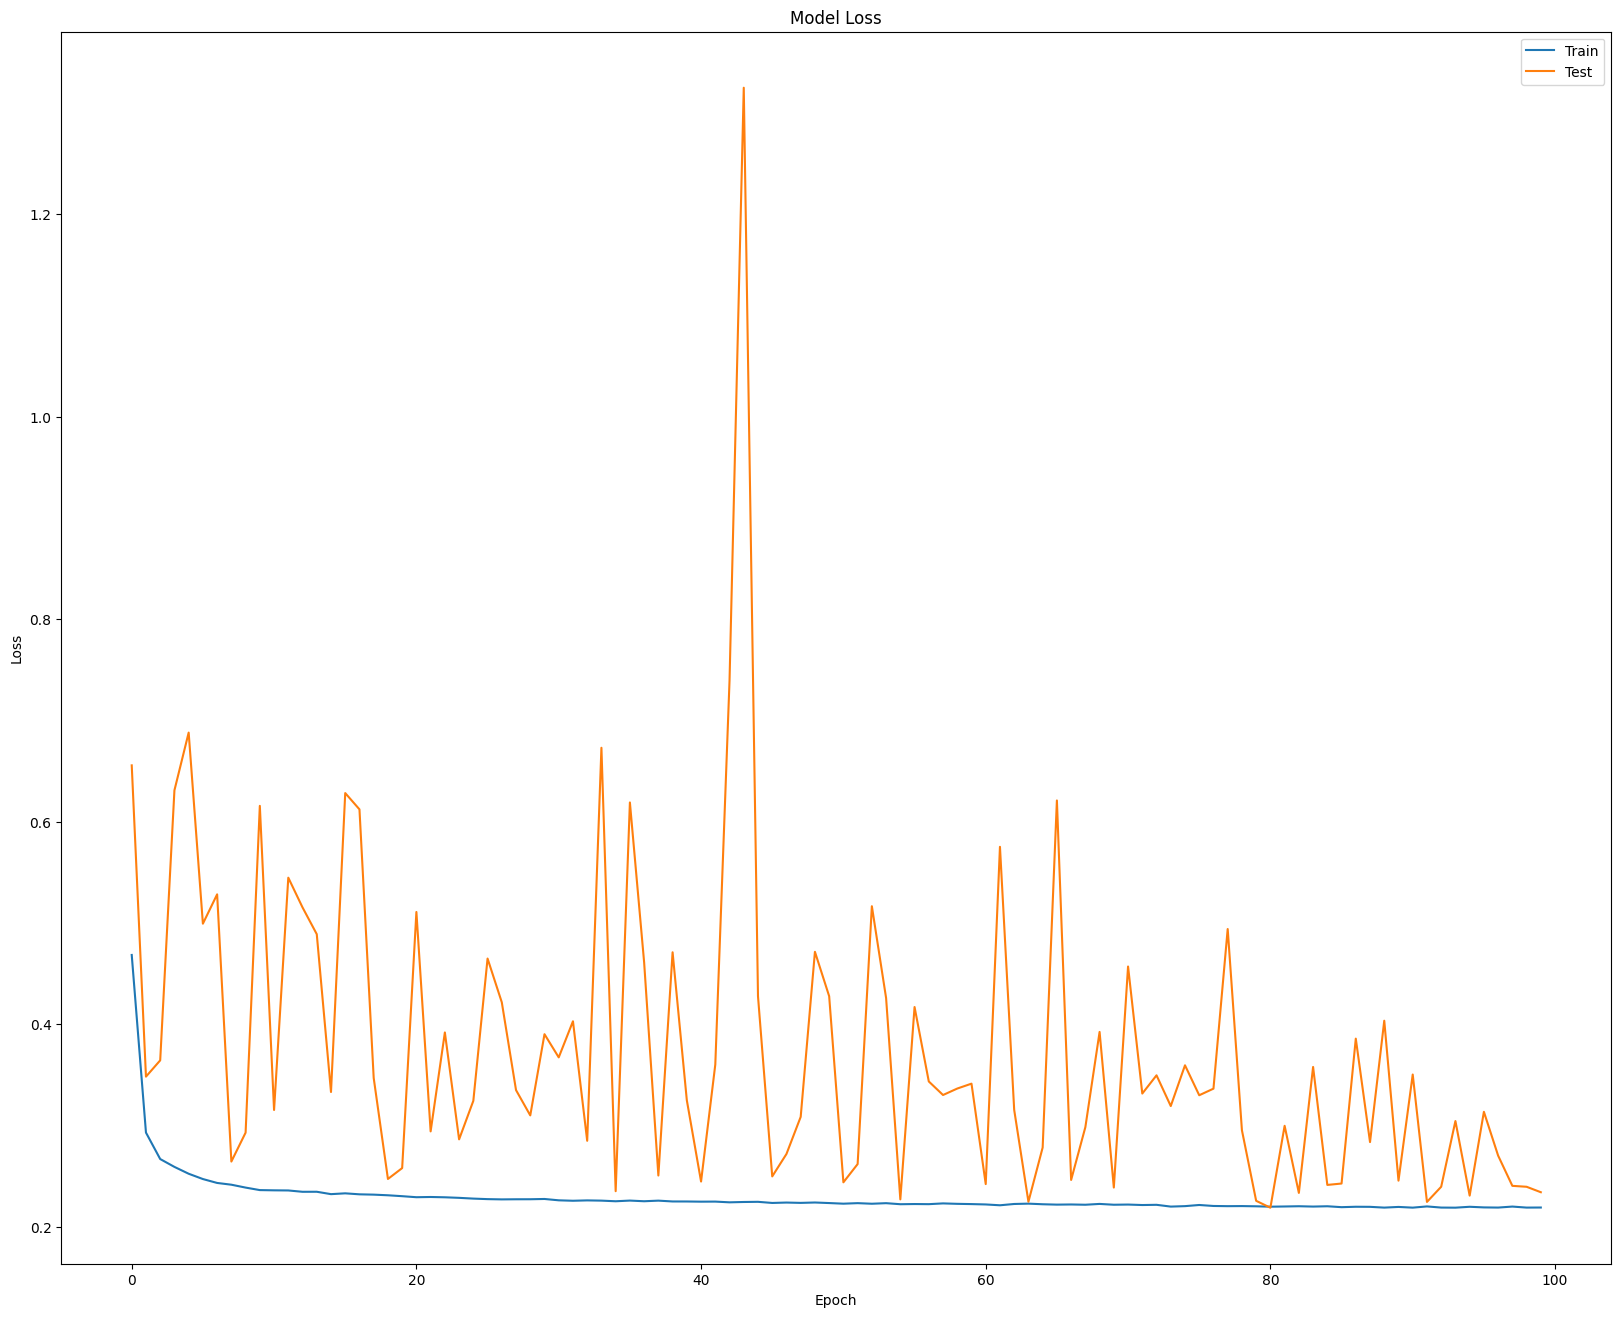

In [16]:
fig, ax = plt.subplots(figsize=(20, 16))

ax.plot(history.history['loss'], label='train')
ax.plot(history.history['val_loss'], label='test')
ax.set_title('Model Loss')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.legend(['Train', 'Test'], loc='upper right')
plt.show()

## Results

### Training

In [17]:
threshold = 0.5  # Adjust the threshold as needed
pred = (pred > threshold).astype(int)

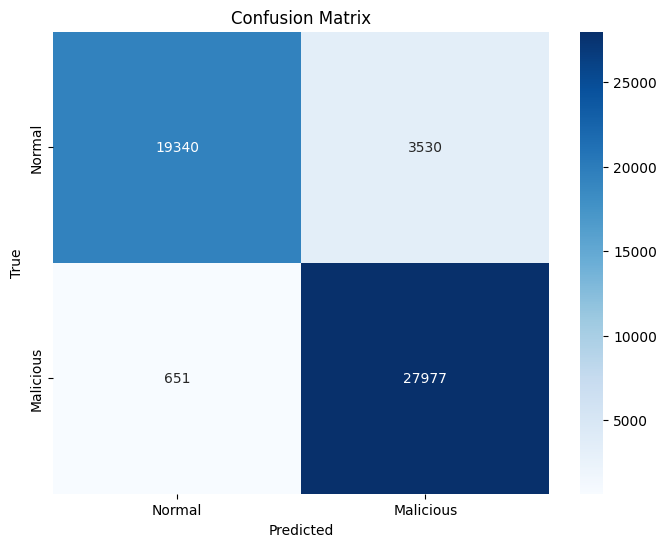

In [18]:
# Compute confusion matrix
cm = confusion_matrix(y_train_test, pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Normal', 'Malicious'], 
            yticklabels=['Normal', 'Malicious'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [19]:
accuracy = accuracy_score(y_train_test, pred)
precision = precision_score(y_train_test, pred)
recall = recall_score(y_train_test, pred)
f1 = f1_score(y_train_test, pred)

print("Accuracy:   {:.2%}".format(accuracy))
print("Precision:  {:.2%}".format(precision))
print("Recall:     {:.2%}".format(recall))
print("F1-score:   {:.2%}".format(f1))

Accuracy:   91.88%
Precision:  88.80%
Recall:     97.73%
F1-score:   93.05%


### with Test Dataset

In [20]:
pred_test = model.predict(X_test)

895/895 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step


In [21]:
threshold = 0.5  # Adjust the threshold as needed
pred_test = (pred_test > threshold).astype(int)

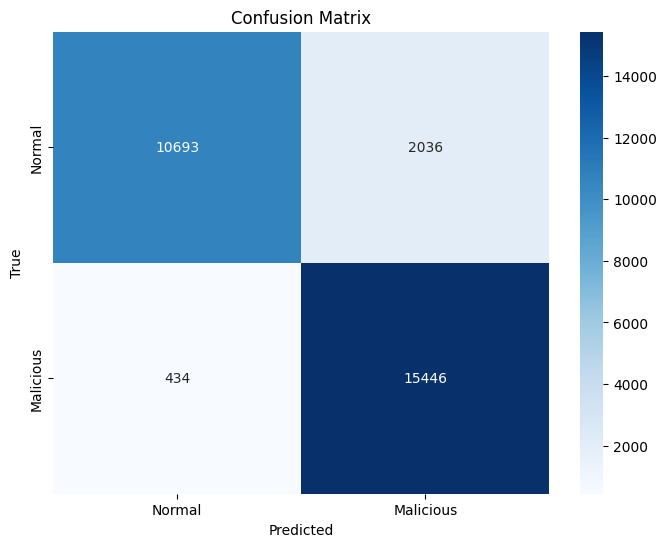

In [22]:
# Compute confusion matrix
cm = confusion_matrix(y_test, pred_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Normal', 'Malicious'], 
            yticklabels=['Normal', 'Malicious'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [23]:
# Compute accuracy
accuracy = accuracy_score(y_test, pred_test)
precision = precision_score(y_test, pred_test)
recall = recall_score(y_test, pred_test)
f1 = f1_score(y_test, pred_test)

print("Accuracy:   {:.2%}".format(accuracy))
print("Precision:  {:.2%}".format(precision))
print("Recall:     {:.2%}".format(recall))
print("F1-score:   {:.2%}".format(f1))

Accuracy:   91.37%
Precision:  88.35%
Recall:     97.27%
F1-score:   92.60%
